In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import missingno as msno
import openpyxl
import sklearn
import urllib.request
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
#%matplotlib inline
#from utility import utils as u
os.chdir("C:\\src\\")
from utility import utils as u

In [3]:
os.chdir("C:\\src\\data\\raw\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\data\\raw'

In [4]:
# Cargamos los ficheros originales 

In [5]:
df1,dr1=u.cargar_fichero("FIFA18_official_data.csv","17-18.csv","01/09/2018")
df2,dr2=u.cargar_fichero("FIFA19_official_data.csv","18-19.csv","01/09/2019")
df3,dr3=u.cargar_fichero("FIFA20_official_data.csv","19-20.csv","01/09/2020")
df4,dr4=u.cargar_fichero("FIFA21_official_data.csv","20-21.csv","01/09/2021")
df5,dr5=u.cargar_fichero("FIFA22_official_data.csv","21-22.csv","01/09/2022")
data_Fifa, data_Real=u.conc_1(df1,df2,df3,df4,dr1,dr2,dr3,dr4)

In [6]:
data_Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70082 entries, 0 to 17107
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        70082 non-null  int64         
 1   Name                      70082 non-null  object        
 2   Age                       70082 non-null  int64         
 3   Photo                     70082 non-null  object        
 4   Nationality               70082 non-null  object        
 5   Flag                      70082 non-null  object        
 6   Overall                   70082 non-null  int64         
 7   Potential                 70082 non-null  int64         
 8   Club                      68879 non-null  object        
 9   Club Logo                 70082 non-null  object        
 10  Value                     70082 non-null  object        
 11  Wage                      70082 non-null  object        
 12  Special           

In [7]:
data_Fifa["Value"] = data_Fifa["Value"].str.replace('€',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('M',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('K',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('€',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('K',"")
data_Fifa["Weight"] = data_Fifa["Weight"].str.replace('lbs',"")
data_Fifa["Weight"] = data_Fifa["Weight"].astype(float)

In [8]:
data_Fifa['Weight']= data_Fifa['Weight'] * 0.453592

In [9]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace("'",".")

In [10]:
data_Fifa["Height"]

0         6.0
1         5.9
2         5.8
3        5.11
4         6.3
         ... 
17103     6.4
17104     6.5
17105     6.3
17106     6.1
17107     6.0
Name: Height, Length: 70082, dtype: object

In [11]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace('lbs',"")
data_Fifa["Height"] = data_Fifa["Height"].str.replace('cm',"")
new = data_Fifa["Height"].str.split(".", n= 1, expand=True)
data_Fifa["Foot"]=new[0]
data_Fifa["inc"]=new[1]
data_Fifa["Height"] = data_Fifa["Height"].astype(float)
data_Fifa["Foot"]=data_Fifa["Foot"].astype(float)
data_Fifa["inc"]=data_Fifa["inc"].astype(float)

In [12]:
data_Fifa["Foot"]=data_Fifa["Foot"]*12
data_Fifa["inc"]=data_Fifa["inc"]*2.54

In [13]:
data_Fifa["Height"]= data_Fifa["Foot"] + data_Fifa["inc"]

In [14]:
df5["Weight"] = df5["Weight"].str.replace('kg',"")
df5["Height"] = df5["Height"].str.replace('cm',"")

In [15]:
df5["Value"] = df5["Value"].str.replace('$',"")
df5["Value"] = df5["Value"].str.replace('M',"")
df5["Value"] = df5["Value"].str.replace('€',"")
df5["Value"] = df5["Value"].str.replace('K',"")

In [16]:
df5["Wage"] = df5["Wage"].str.replace('€',"")
df5["Wage"] = df5["Wage"].str.replace('K',"")
df5["Wage"] = df5["Wage"].str.replace('M',"")

In [17]:
df5.shape

(16710, 67)

In [18]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,40.0,56.0,GK,49.0,€120K,2021-01-09,1,NaN,72.0,10.16
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,42.0,57.0,GK,51.0,€83K,2021-01-09,1,5.0,72.0,12.70
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,53.0,55.0,GK,51.0,€149K,2021-01-09,1,8.0,72.0,7.62
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,50.0,51.0,GK,49.0,€94K,2021-01-09,1,8.0,72.0,2.54


In [182]:
df5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year,Orden
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2022-01-09,1
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2022-01-09,1
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2022-01-09,1
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2022-01-09,1
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2022-01-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN,2022-01-09,1
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0,2022-01-09,1
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0,2022-01-09,1
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0,2022-01-09,1


In [20]:
data_Fifa, data_Real=u.c5(data_Fifa,df5,data_Real,dr5)

In [21]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,50.0,59.0,GK,52.0,€238K,2022-01-09,1,NaN,NaN,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,48.0,58.0,GK,53.0,€279K,2022-01-09,1,5.0,NaN,NaN
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,38.0,52.0,GK,47.0,€223K,2022-01-09,1,21.0,NaN,NaN
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,45.0,49.0,GK,47.0,€259K,2022-01-09,1,7.0,NaN,NaN


In [22]:
data_Real=u.limpiar_dataframe(data_Real)
data_Fifa=u.limpiar_dataframe2(data_Fifa)
data_Fifa=u.cambios_nombre(data_Fifa)
data_Real, data_Fifa, pais1, pais2, pais3, pais4, pais5=u.equipo_anyo(data_Fifa,data_Real)
data_Fifa =u.liga(pais1,data_Fifa,"2018-01-09")
data_Fifa =u.liga(pais2,data_Fifa,"2019-01-09")
data_Fifa =u.liga(pais3,data_Fifa,"2020-01-09")
data_Fifa =u.liga(pais4,data_Fifa,"2021-01-09")
data_Fifa =u.liga(pais5,data_Fifa,"2022-01-09")
data_Fifa, data_Real=u.modificar_dataframe(data_Fifa, data_Real)

In [23]:
data_Fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,...,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY,TOT
0,L. Suárez,30,Uruguay,92,92,Barcelona,97,500,2321,Right,...,72.0,0.00,ESP,82.5,88.666667,79.666667,86.500000,46.2,82.00,77.588889
1,R. Nainggolan,29,Belgium,86,86,Roma,42.5,130,2286,Right,...,60.0,22.86,ITA,78.0,78.666667,75.833333,83.500000,79.4,83.50,79.816667
2,A. Florenzi,26,Italy,82,83,Roma,21,70,2267,Right,...,60.0,20.32,ITA,85.0,80.833333,77.000000,82.166667,75.6,77.75,79.725000
3,D. Alaba,25,Austria,85,87,Bayern Munich,38.5,130,2263,Left,...,60.0,27.94,GER,83.5,75.666667,80.666667,80.166667,79.8,76.75,79.425000
4,P. Pogba,24,France,88,92,Manchester Utd,76,250,2262,Right,...,72.0,7.62,ENG,76.5,81.500000,84.833333,81.000000,69.4,86.25,79.913889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,N. Sauter,18,Germany,56,69,Freiburg,300,500,842,Right,...,NaN,NaN,GER,27.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16662,V. Sinisalo,19,Finland,55,70,Aston Villa,250,2,841,Right,...,NaN,NaN,ENG,23.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16676,L. Philipp,20,Germany,60,72,Hoffenheim,525,2,831,Right,...,NaN,NaN,GER,26.5,0.000000,0.000000,0.000000,0.0,0.00,53.750000
16690,P. Zovko,19,Bosnia and Herzegovina,58,73,Spezia,425,850,816,Left,...,NaN,NaN,ITA,20.0,0.000000,0.000000,0.000000,0.0,0.00,52.500000


In [24]:
# Calcular por equipo y año el valor medio de la plantilla, sumando las cartas totales y dividiendolo por numero de jugadores, para cada equipo y cada liga. 
#data_medias=data_Fifa.groupby(by=["Club","Year","Pais"]).mean()  
# data_medias=data_Fifa.groupby(by=["Club","Year"]).mean()  
data_medias=data_Fifa[data_Fifa.Pais == "ESP"].groupby(by=["Club","Year"]).mean()

In [25]:
#Exportar
data_Fifa, data_Real, data_medias, data_medidas_1=u.exportar(data_Fifa, data_Real)
u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

***HASTA AQUI DEBERIA ESTAR TODO EN FUNCIONES ***

In [26]:
data_Fifa2=data_Fifa

**MINI EDA*** 

## Comprobamos si existen nulos

In [27]:
data_Fifa2.describe(include='all')

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,...,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY,TOT
count,14198,14198.000000,14198,14198.000000,14198.000000,14198,14198,14198,14198.000000,14198,...,11175.000000,11175.000000,14198,14198.000000,14171.000000,14171.000000,14012.000000,14171.000000,14171.000000,14012.000000
unique,8517,NaN,129,NaN,NaN,114,270,157,NaN,2,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Danilo,NaN,Spain,NaN,NaN,Paris S-G,5.5,20,NaN,Right,...,NaN,NaN,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,2423,NaN,NaN,320,351,959,NaN,10581,...,NaN,NaN,3468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.838287,NaN,71.824412,77.415622,NaN,NaN,NaN,1714.130230,NaN,...,66.542819,13.082307,NaN,65.771447,51.161551,53.686719,60.417273,50.773044,59.159728,63.233369
std,NaN,4.994374,NaN,7.819012,5.566128,NaN,NaN,NaN,298.527923,NaN,...,5.975663,10.537840,NaN,14.396145,22.355689,22.006033,22.984775,24.023135,22.736112,7.414984
min,NaN,16.000000,NaN,38.000000,55.000000,NaN,NaN,NaN,755.000000,NaN,...,60.000000,0.000000,NaN,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.561111
25%,NaN,21.000000,NaN,66.000000,74.000000,NaN,NaN,NaN,1538.000000,NaN,...,60.000000,2.540000,NaN,58.000000,40.500000,47.500000,58.666667,35.400000,56.250000,57.418750


<AxesSubplot:>

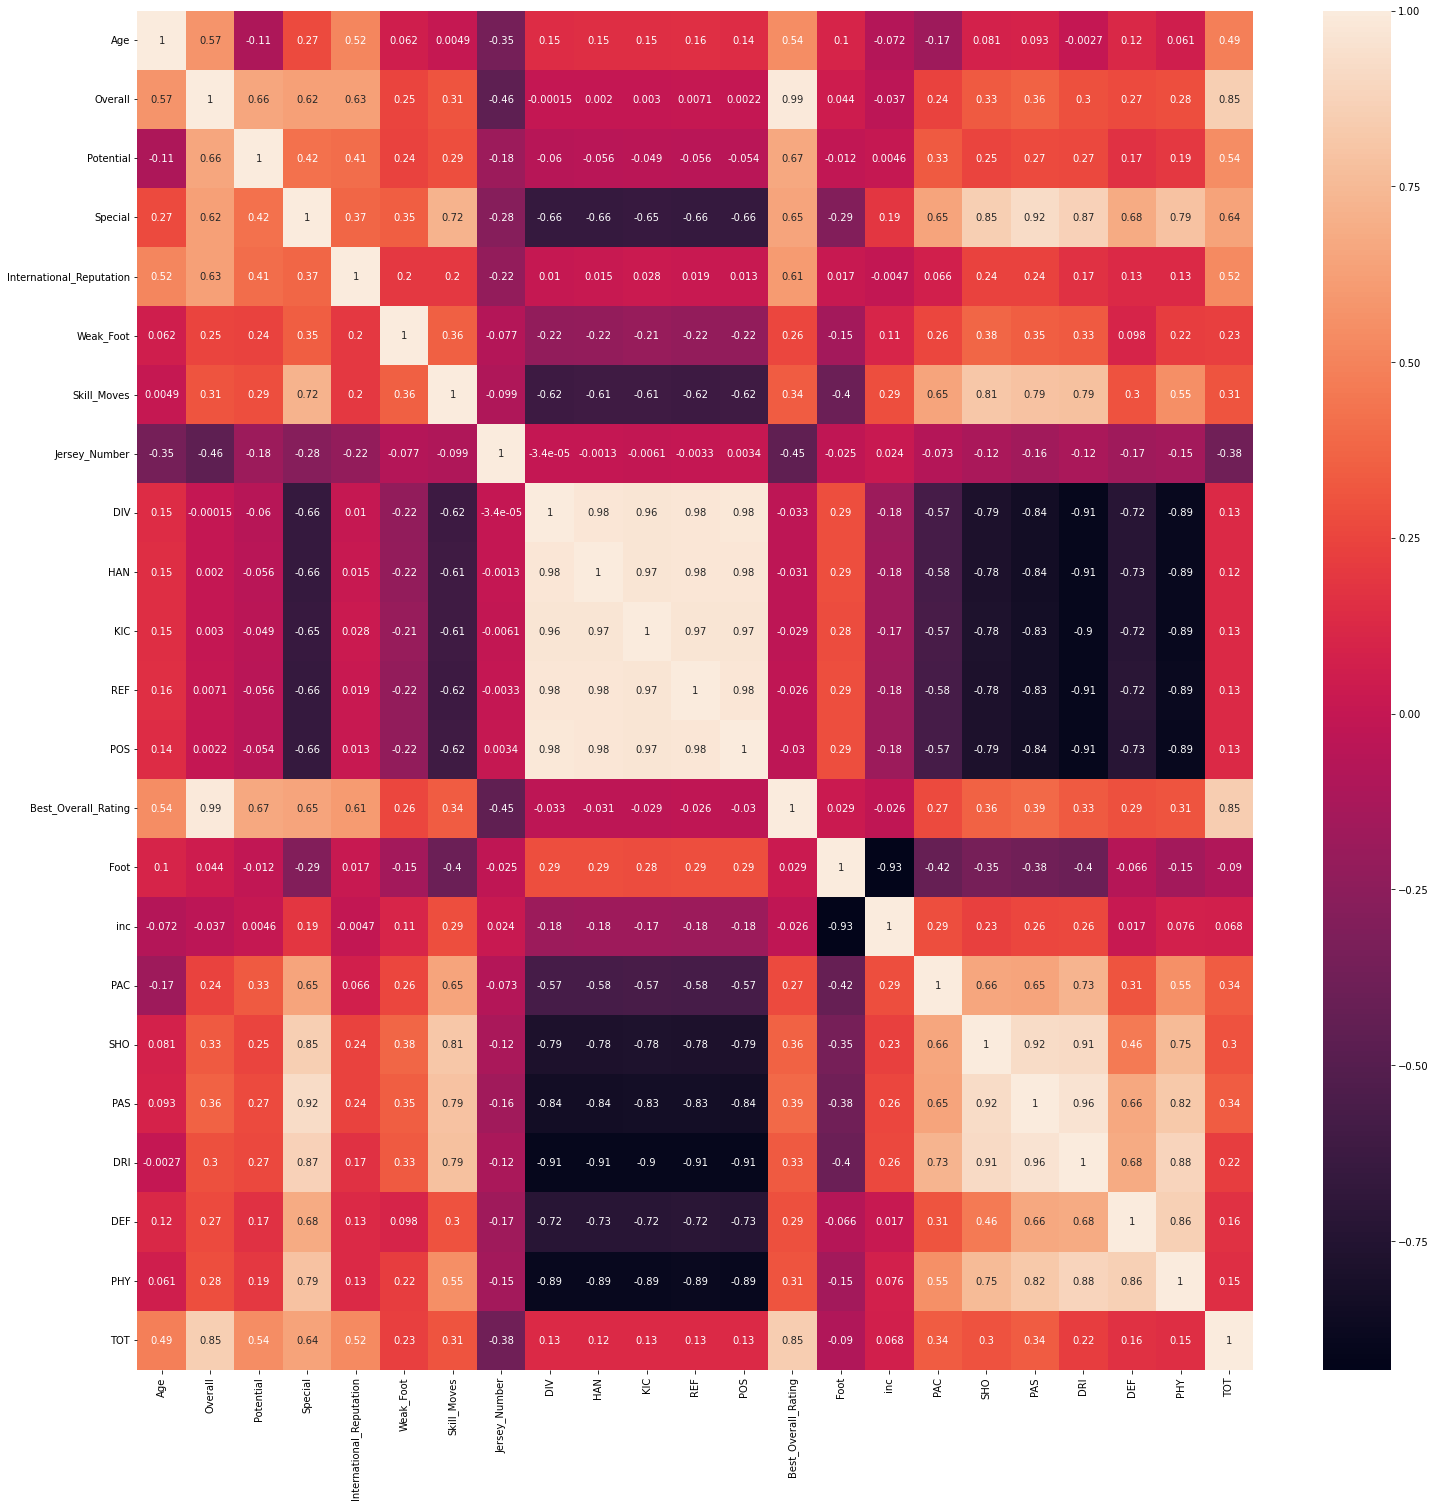

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(data_Fifa2.corr(), annot=True)

In [186]:
corr_df=data_Fifa2.corr()

In [187]:
corr_df

,Age,Overall,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,...,REF,POS,Best_Overall_Rating,PAC,SHO,PAS,DRI,DEF,PHY,TOT
Age,1.000000,0.571113,-0.105354,-0.279151,-0.050215,0.268973,0.515204,0.062390,0.004884,0.071638,...,0.157257,0.143751,0.544167,-0.172790,0.080618,0.092891,-0.002654,0.117431,0.061283,0.485593
Overall,0.571113,1.000000,0.655308,-0.530618,0.048997,0.624478,0.628213,0.246337,0.311592,0.004351,...,0.007085,0.002246,0.987756,0.244183,0.332154,0.361841,0.295901,0.273074,0.283040,0.849130
Potential,-0.105354,0.655308,1.000000,-0.325230,0.145408,0.420249,0.408004,0.243944,0.288007,-0.020728,...,-0.056256,-0.054192,0.666166,0.328109,0.250907,0.272248,0.267025,0.167938,0.194709,0.542753
Value,-0.279151,-0.530618,-0.325230,1.000000,0.006018,-0.378334,-0.232481,-0.121645,-0.206836,-0.034060,...,0.048544,0.049754,-0.532694,-0.179846,-0.213758,-0.238421,-0.213304,-0.196087,-0.215860,-0.464631
Wage,-0.050215,0.048997,0.145408,0.006018,1.000000,0.020235,0.191187,0.035590,0.014976,0.014416,...,0.008724,0.012690,0.053849,-0.000932,0.008860,0.008608,0.001311,-0.006939,-0.007354,0.041767
Special,0.268973,0.624478,0.420249,-0.378334,0.020235,1.000000,0.374925,0.349835,0.718397,0.005760,...,-0.655068,-0.659807,0.647607,0.649991,0.854587,0.917943,0.870309,0.676801,0.794711,0.638693
International_Reputation,0.515204,0.628213,0.408004,-0.232481,0.191187,0.374925,1.000000,0.198877,0.197531,0.025225,...,0.018918,0.013255,0.606273,0.065772,0.237840,0.237605,0.168877,0.128460,0.127781,0.524834
Weak_Foot,0.062390,0.246337,0.243944,-0.121645,0.035590,0.349835,0.198877,1.000000,0.355706,0.010502,...,-0.218921,-0.224421,0.255950,0.258373,0.380119,0.349852,0.330086,0.097867,0.218665,0.228631
Skill_Moves,0.004884,0.311592,0.288007,-0.206836,0.014976,0.718397,0.197531,0.355706,1.000000,0.008936,...,-0.616680,-0.615802,0.342895,0.649568,0.813810,0.790855,0.787257,0.299514,0.550029,0.312212
Height,0.071638,0.004351,-0.020728,-0.034060,0.014416,0.005760,0.025225,0.010502,0.008936,1.000000,...,0.006554,0.004810,0.045935,-0.014847,0.002852,0.002330,-0.000978,-0.001915,-0.001234,0.011111


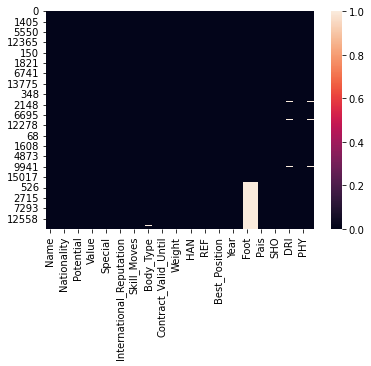

In [29]:
#Analizamos datos vemos las columnas que contienen nulos y adaptamos lo que necesitamos , ver memoria
sns.heatmap(data_Fifa2.isnull(),cbar=True);

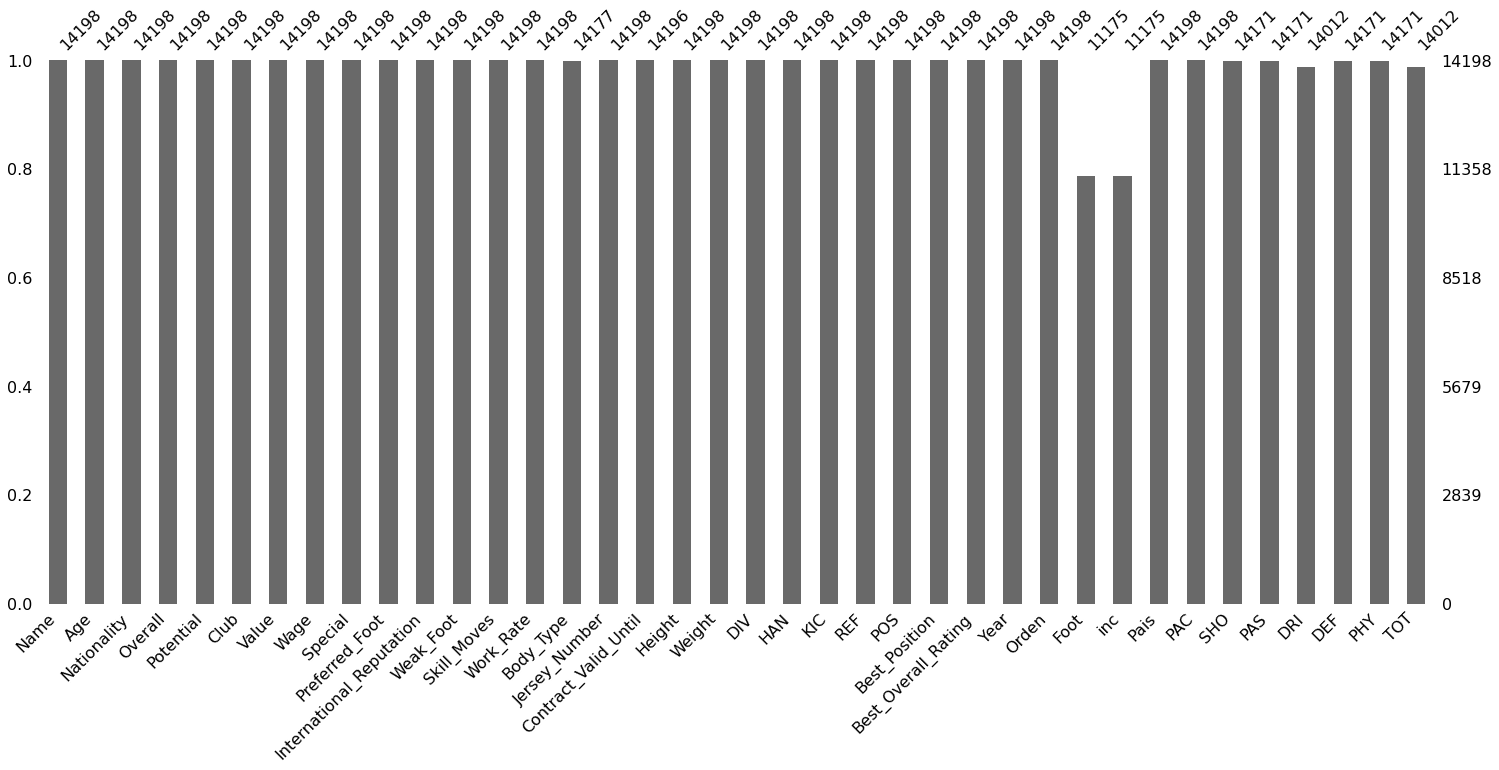

In [30]:
msno.bar(data_Fifa2);

In [31]:
data_Fifa2.isna().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred_Foot                 0
International_Reputation       0
Weak_Foot                      0
Skill_Moves                    0
Work_Rate                      0
Body_Type                     21
Jersey_Number                  0
Contract_Valid_Until           2
Height                         0
Weight                         0
DIV                            0
HAN                            0
KIC                            0
REF                            0
POS                            0
Best_Position                  0
Best_Overall_Rating            0
Year                           0
Orden                          0
Foot                        3023
inc                         3023
Pais      

## Eliminamos nulos asignando los valores de las medias de cada variable

In [32]:
data_Fifa2=data_Fifa2.fillna(data_Fifa2.mean())

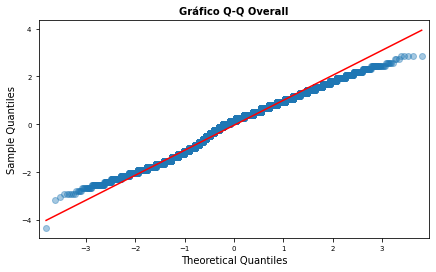

In [33]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa2["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

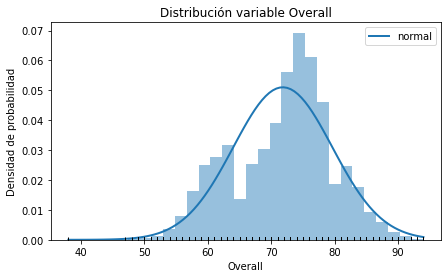

In [34]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa2["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa2["Overall"]), max(data_Fifa2["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa2["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa2["Overall"], np.full_like(data_Fifa2["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [35]:
# Probamos si la muestra difiere de una distribución normal.

In [36]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa2.Overall);
shapiro_test

ShapiroResult(statistic=0.9812974333763123, pvalue=2.905889441051945e-39)

In [37]:
# Diagramas de cajas 

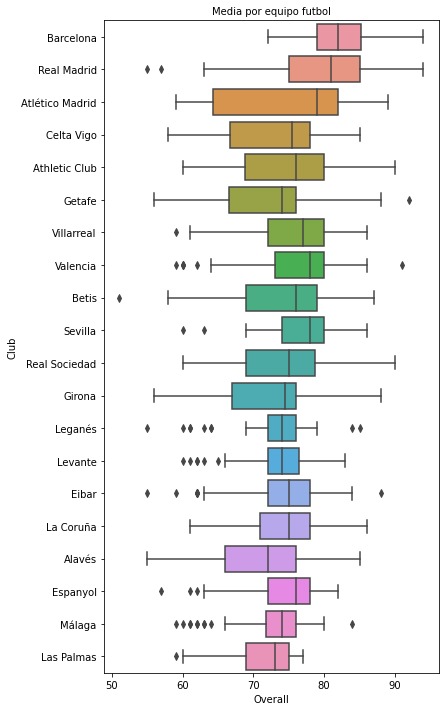

In [38]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Media por equipo futbol', fontsize=10)
plt.ylabel('Club', fontsize=10)
plt.xlabel('Overall', fontsize=10)
sns.boxplot(y=data_Fifa2.Club[(data_Fifa2.Pais=="ESP")&(data_Fifa.Year=="2018-01-09")], x=data_Fifa2["Overall"]);

Cuadrado de relacion y algo mas de EDA ver pycaret

*** PREPARACION DE DATOS PARA EL MODELO DE ML ***


## Eliminamos variables que no aportan nada al modelo y creamos copia del dataframe original

In [39]:
data_Fifa2=data_Fifa.drop(["Name","Nationality","Club","Body_Type","Year","Orden","Pais","Foot","inc","Contract_Valid_Until","Jersey_Number"], axis =1)

## Revisamos el formato de las variables y convertimos las variables que nos interesan de objeto a float

In [40]:
data_Fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14198 entries, 0 to 16691
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14198 non-null  int64  
 1   Overall                   14198 non-null  int64  
 2   Potential                 14198 non-null  int64  
 3   Value                     14198 non-null  object 
 4   Wage                      14198 non-null  object 
 5   Special                   14198 non-null  int64  
 6   Preferred_Foot            14198 non-null  object 
 7   International_Reputation  14198 non-null  float64
 8   Weak_Foot                 14198 non-null  float64
 9   Skill_Moves               14198 non-null  float64
 10  Work_Rate                 14198 non-null  object 
 11  Height                    14198 non-null  object 
 12  Weight                    14198 non-null  object 
 13  DIV                       14198 non-null  float64
 14  HAN   

In [41]:
data_Fifa2["Wage"]=data_Fifa2["Wage"].astype(float)

In [42]:
data_Fifa2["Value"]=data_Fifa2["Value"].astype(float)

In [43]:
data_Fifa2["Height"]=data_Fifa2["Height"].astype(float)

In [44]:
data_Fifa2["Weight"]=data_Fifa2["Weight"].astype(float)

# Vemos los valores unicos por variables , para decidir si usamos dummies o similar

In [45]:
for i in data_Fifa2.columns:
    print(f'la columna {i} tiene {data_Fifa2[i].nunique()} valores únicos',{data_Fifa2[i].dtype})


la columna Age tiene 28 valores únicos {dtype('int64')}
la columna Overall tiene 49 valores únicos {dtype('int64')}
la columna Potential tiene 40 valores únicos {dtype('int64')}
la columna Value tiene 270 valores únicos {dtype('float64')}
la columna Wage tiene 157 valores únicos {dtype('float64')}
la columna Special tiene 1415 valores únicos {dtype('int64')}
la columna Preferred_Foot tiene 2 valores únicos {dtype('O')}
la columna International_Reputation tiene 5 valores únicos {dtype('float64')}
la columna Weak_Foot tiene 5 valores únicos {dtype('float64')}
la columna Skill_Moves tiene 5 valores únicos {dtype('float64')}
la columna Work_Rate tiene 10 valores únicos {dtype('O')}
la columna Height tiene 59 valores únicos {dtype('float64')}
la columna Weight tiene 94 valores únicos {dtype('float64')}
la columna DIV tiene 68 valores únicos {dtype('float64')}
la columna HAN tiene 72 valores únicos {dtype('float64')}
la columna KIC tiene 74 valores únicos {dtype('float64')}
la columna REF ti

In [46]:
data_Fifa2["Work_Rate"]

0          High/ Medium
1            High/ High
2          High/ Medium
3          High/ Medium
4             High/ Low
              ...      
16661    Medium/ Medium
16662    Medium/ Medium
16676    Medium/ Medium
16690    Medium/ Medium
16691    Medium/ Medium
Name: Work_Rate, Length: 14198, dtype: object

In [47]:
data_Fifa2["Preferred_Foot"]

0        Right
1        Right
2        Right
3         Left
4        Right
         ...  
16661    Right
16662    Right
16676    Right
16690     Left
16691    Right
Name: Preferred_Foot, Length: 14198, dtype: object

Antes de categorizar separamos por posicion en campo 

In [48]:
# Separar porteros de jugadores , arreglar los dataframes, eliminando las varibles que no corresponden al tipo de jugador
data_Fifa_FOT=data_Fifa2[(data_Fifa2['Best_Position'] != "GK")]

In [49]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_FOT=data_Fifa_FOT.drop(["DIV","HAN","KIC","REF","POS"], axis =1)

In [50]:
data_Fifa_FOT=data_Fifa_FOT.drop(["Best_Position"], axis =1)

# categorizamos las variables objetos

In [51]:
# We convert Categorical to boolean for first dataset
categorical_feature = (data_Fifa_FOT.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_FOT.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_FOT = pd.get_dummies(data_Fifa_FOT, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )


# normalizamos las variables numericas para que esten todas a escala, exceptuando overall

In [52]:
# Min-Max Normalization
data_Fifa2_1 = data_Fifa_FOT.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_FOT.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_FOT["Overall"]

data_Fifa_FOT=data_Fifa2_norm

In [53]:
data_Fifa_FOT=data_Fifa_FOT.fillna(data_Fifa_FOT.mean())

In [54]:
data_Fifa_FOT

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Work_Rate_High/ Low,Work_Rate_High/ Medium,Work_Rate_Low/ High,Work_Rate_Low/ Low,Work_Rate_Low/ Medium,Work_Rate_Medium/ High,Work_Rate_Medium/ Low,Work_Rate_Medium/ Medium,Work_Rate_N/A/ N/A,Overall
0,0.538462,0.925,0.099487,0.526316,0.980782,1.00,0.75,0.75,0.032839,0.707965,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
1,0.500000,0.775,0.043590,0.136842,0.956760,0.50,0.50,0.50,0.114260,0.530973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86
2,0.384615,0.700,0.021538,0.073684,0.943720,0.50,0.50,0.50,0.095217,0.336283,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82
3,0.346154,0.800,0.039487,0.136842,0.940975,0.75,0.75,0.50,0.152347,0.513274,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85
4,0.307692,0.925,0.077949,0.263158,0.940288,0.75,0.75,1.00,0.089969,0.663717,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15184,0.153846,0.575,0.000000,0.000000,0.258751,0.00,0.50,0.00,0.812566,0.314205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70
15226,0.076923,0.400,0.358974,0.526316,0.251887,0.00,0.50,0.25,0.895037,0.587345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57
15339,0.076923,0.300,0.112821,0.736842,0.233356,0.00,0.25,0.25,0.820063,0.470285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49
15383,0.076923,0.400,0.358974,0.526316,0.226493,0.00,0.50,0.25,0.880042,0.489795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57


In [55]:
#data_Fifa_GK_, data_Fifa_FOT=u.exportar(data_Fifa, data_Real)  # marcar la lineas 1 y 2 de la funcion exportar en utility

In [56]:
data_Fifa_FOT.columns

Index(['Age', 'Potential', 'Value', 'Wage', 'Special',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Height',
       'Weight', 'Best_Overall_Rating', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'TOT', 'Preferred_Foot_Right', 'Work_Rate_High/ Low',
       'Work_Rate_High/ Medium', 'Work_Rate_Low/ High', 'Work_Rate_Low/ Low',
       'Work_Rate_Low/ Medium', 'Work_Rate_Medium/ High',
       'Work_Rate_Medium/ Low', 'Work_Rate_Medium/ Medium',
       'Work_Rate_N/A/ N/A', 'Overall'],
      dtype='object')

In [57]:
data_Fifa_FOT.to_csv("my_model_FOT.csv", sep=',', encoding="utf-8", index=False)

*** ENTRENAMIENTO DEL MODELO ***  Falta para los porteros, ojo

In [58]:
train=data_Fifa_FOT

In [59]:
#Exportar
train.to_csv("my_model.csv", sep=',', encoding="utf-8", index=False)
#u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

In [60]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(12636, 28)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [62]:
X_train

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,...,Preferred_Foot_Right,Work_Rate_High/ Low,Work_Rate_High/ Medium,Work_Rate_Low/ High,Work_Rate_Low/ Low,Work_Rate_Low/ Medium,Work_Rate_Medium/ High,Work_Rate_Medium/ Low,Work_Rate_Medium/ Medium,Work_Rate_N/A/ N/A
907,0.153846,0.775,0.012821,0.034737,0.757721,0.0,0.50,0.50,0.114260,0.433628,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
251,0.461538,0.625,0.012821,0.038947,0.825669,0.0,0.50,0.75,0.076173,0.292035,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3883,0.576923,0.450,0.003487,0.016842,0.641043,0.0,0.75,0.50,0.032839,0.353982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11158,0.615385,0.625,0.008718,0.115789,0.442690,0.5,0.50,0.25,0.147099,0.778761,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10419,0.153846,0.425,0.461538,0.009474,0.472889,0.0,0.75,0.25,0.152347,0.486726,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,0.538462,0.425,0.001949,0.020000,0.498970,0.0,0.50,0.25,0.917529,0.665385,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,0.307692,0.650,0.013333,0.046316,0.737817,0.0,0.75,0.75,0.095217,0.336283,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,0.384615,0.525,0.007179,0.060000,0.708305,0.0,0.50,0.50,0.152347,0.469027,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2127,0.461538,0.500,0.005641,0.042105,0.682910,0.0,0.50,0.50,0.114260,0.451327,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*** MODELOS REGRESION LINEAL *** 

*** METRICAS DE CADA MODELO MAE MSE MSQE**


# Modelos sin parametros, con valores por defecto, sacamos df con valores :
# Modelo MAE MSE RMSE

**Linear Reggression**

mean_absolute_error(y_test,prediction)

In [63]:
#!pip install xgboost

In [64]:
#!pip install lightgbm

In [65]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb

In [66]:
import math
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#baseline_error = mean_squared_error(y_test,lr.predict(X_test))

MAE_lr=mean_absolute_error(y_test, lr.predict(X_test))
MSE_lr=mean_squared_error(y_test, lr.predict(X_test))
RMSE_lr=np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

MAE test 0.8673743413698728
MSE test 1.143506536845229
RMSE test 1.0693486507426981


Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

In [69]:
#lasso = Lasso(alpha=6000)
lasso = Lasso()
lasso.fit(X_train, y_train)

MAE_lasso=mean_absolute_error(y_test, lasso.predict(X_test))
MSE_lasso=mean_squared_error(y_test, lasso.predict(X_test))
RMSE_lasso=np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MAE test 5.763519854188944
MSE test 50.54170164717049
RMSE test 7.109268713951562


Ridge Regression

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
ridge = Ridge()
ridge.fit(X_train, y_train)

MAE_ridge=mean_absolute_error(y_test, ridge.predict(X_test))
MSE_ridge=mean_squared_error(y_test, ridge.predict(X_test))
RMSE_ridge=np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 0.8633451524704784
MSE test 1.1413256979293156
RMSE test 1.0683284597581941


Elastic net

In [72]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [73]:
#elastic = ElasticNet(alpha=72, l1_ratio=0.99)
elastic = ElasticNet()
elastic.fit(X_train, y_train)

MAE_elastic=mean_absolute_error(y_test, elastic.predict(X_test))
MSE_elastic=mean_squared_error(y_test, elastic.predict(X_test))
RMSE_elastic=np.sqrt(mean_squared_error(y_test, elastic.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MAE test 5.532150117566273
MSE test 46.96898433509242
RMSE test 6.853392177242772


*** LARS

In [74]:
from numpy import sqrt
from sklearn import linear_model
from sklearn.linear_model import Lars

In [75]:
lars= Lars()
lars.fit(X_train, y_train)

MAE_lars=mean_absolute_error(y_test, lars.predict(X_test))
MSE_lars=mean_squared_error(y_test, lars.predict(X_test))
RMSE_lars=np.sqrt(mean_squared_error(y_test, lars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lars.predict(X_test))))

MAE test 0.9167227364435271
MSE test 1.3918398345750806
RMSE test 1.179762617891871


RandomForest

In [76]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

MAE_rf=mean_absolute_error(y_test, rf.predict(X_test))
MSE_rf=mean_squared_error(y_test, rf.predict(X_test))
RMSE_rf=np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE test', mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

MAE test 0.34335047468354446
MSE test 0.29142931170886077
RMSE test 0.539841932151311


Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)

MAE_gnb=mean_absolute_error(y_test, gnb.predict(X_test))
MSE_gnb=mean_squared_error(y_test, gnb.predict(X_test))
RMSE_gnb=np.sqrt(mean_squared_error(y_test, gnb.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gnb.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gnb.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gnb.predict(X_test))))

MAE test 2.2772943037974684
MSE test 8.853243670886076
RMSE test 2.975440080204284


Llar

In [79]:
lassolars = linear_model.LassoLars()
lassolars.fit(X_train, y_train).predict(X_test)

MAE_lassolars=mean_absolute_error(y_test, lassolars.predict(X_test))
MSE_lassolars=mean_squared_error(y_test, lassolars.predict(X_test))
RMSE_lassolars=np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lassolars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lassolars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test))))

MAE test 6.2249854263824105
MSE test 58.96202312493425
RMSE test 7.678673265931703


Omp

In [80]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [81]:
omp = OrthogonalMatchingPursuit()
omp.fit(X_train, y_train).predict(X_test)

MAE_omp=mean_absolute_error(y_test, omp.predict(X_test))
MSE_omp=mean_squared_error(y_test, omp.predict(X_test))
RMSE_omp=np.sqrt(mean_squared_error(y_test, omp.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, omp.predict(X_test)))
print('MSE test', mean_squared_error(y_test, omp.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, omp.predict(X_test))))

MAE test 0.9856018533402152
MSE test 1.4752991972970453
RMSE test 1.2146189514810994


Bayesian ridge

In [82]:
from sklearn.linear_model import BayesianRidge

In [83]:
br = BayesianRidge()
br.fit(X_train, y_train).predict(X_test)

MAE_br=mean_absolute_error(y_test, br.predict(X_test))
MSE_br=mean_squared_error(y_test, br.predict(X_test))
RMSE_br=np.sqrt(mean_squared_error(y_test, br.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, br.predict(X_test)))
print('MSE test', mean_squared_error(y_test, br.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, br.predict(X_test))))

MAE test 0.8672592800278378
MSE test 1.1433383151095198
RMSE test 1.0692699916810158


Automatic Relevance Determination

In [84]:
from sklearn.linear_model import ARDRegression

In [85]:
ard = ARDRegression()
ard.fit(X_train, y_train).predict(X_test)

MAE_ard=mean_absolute_error(y_test, ard.predict(X_test))
MSE_ard=mean_squared_error(y_test, ard.predict(X_test))
RMSE_ard=np.sqrt(mean_squared_error(y_test, ard.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ard.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ard.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ard.predict(X_test))))

MAE test 0.8678086016651074
MSE test 1.1454109109650674
RMSE test 1.0702387168127807


Passive Aggressive Regressor

In [86]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [87]:
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train).predict(X_test)

MAE_par=mean_absolute_error(y_test, par.predict(X_test))
MSE_par=mean_squared_error(y_test, par.predict(X_test))
RMSE_par=np.sqrt(mean_squared_error(y_test, par.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, par.predict(X_test)))
print('MSE test', mean_squared_error(y_test, par.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, par.predict(X_test))))

MAE test 1.3598509317197676
MSE test 2.6403249125175545
RMSE test 1.6249076627665815


Huber Regressor

In [88]:
from sklearn.linear_model import HuberRegressor

In [89]:
huber = HuberRegressor()
huber.fit(X_train, y_train).predict(X_test)

MAE_huber=mean_absolute_error(y_test, huber.predict(X_test))
MSE_huber=mean_squared_error(y_test, huber.predict(X_test))
RMSE_huber=np.sqrt(mean_squared_error(y_test, huber.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, huber.predict(X_test)))
print('MSE test', mean_squared_error(y_test, huber.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, huber.predict(X_test))))

MAE test 0.8679546177513509
MSE test 1.1565528524031667
RMSE test 1.0754314726672112


K Neighbors Regressor

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train).predict(X_test)

MAE_knn=mean_absolute_error(y_test, knn.predict(X_test))
MSE_knn=mean_squared_error(y_test, knn.predict(X_test))
RMSE_knn=np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, knn.predict(X_test)))
print('MSE test', mean_squared_error(y_test, knn.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, knn.predict(X_test))))

MAE test 1.4428797468354433
MSE test 3.685854430379747
RMSE test 1.9198579193210488


Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor 

In [93]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train).predict(X_test)

MAE_dt=mean_absolute_error(y_test, dt.predict(X_test))
MSE_dt=mean_squared_error(y_test, dt.predict(X_test))
RMSE_dt=np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dt.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dt.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

MAE test 0.38014240506329117
MSE test 0.6269778481012658
RMSE test 0.7918193279412077


Extra Trees Regressor

In [94]:
from sklearn.ensemble import ExtraTreesRegressor

In [95]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train).predict(X_test)

MAE_et=mean_absolute_error(y_test, et.predict(X_test))
MSE_et=mean_squared_error(y_test, et.predict(X_test))
RMSE_et=np.sqrt(mean_squared_error(y_test, et.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, et.predict(X_test)))
print('MSE test', mean_squared_error(y_test, et.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, et.predict(X_test))))

MAE test 0.33623417721519
MSE test 0.24613924050632935
RMSE test 0.49612421882662544


AdaBoost Regressor

In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train).predict(X_test)

MAE_ada=mean_absolute_error(y_test, ada.predict(X_test))
MSE_ada=mean_squared_error(y_test, ada.predict(X_test))
RMSE_ada=np.sqrt(mean_squared_error(y_test, ada.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ada.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ada.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ada.predict(X_test))))

MAE test 1.144248647100163
MSE test 1.9101223999424533
RMSE test 1.3820717781441214


Gradient Boosting Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train).predict(X_test)

MAE_gbr=mean_absolute_error(y_test, gbr.predict(X_test))
MSE_gbr=mean_squared_error(y_test, gbr.predict(X_test))
RMSE_gbr=np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gbr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gbr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

MAE test 0.7021451547043039
MSE test 0.7801588535896975
RMSE test 0.8832660151900431


Extreme Gradient Boosting

In [100]:
from xgboost import XGBRegressor

In [101]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train).predict(X_test)

MAE_xgboost=mean_absolute_error(y_test, xgboost.predict(X_test))
MSE_xgboost=mean_squared_error(y_test, xgboost.predict(X_test))
RMSE_xgboost=np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, xgboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, xgboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test))))

MAE test 0.35255946992318843
MSE test 0.24364465306340047
RMSE test 0.4936037409333528


Light Gradient Boosting Machine

In [102]:
from lightgbm import LGBMRegressor

In [103]:
lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train).predict(X_test)

MAE_lightgbm=mean_absolute_error(y_test, lightgbm.predict(X_test))
MSE_lightgbm=mean_squared_error(y_test, lightgbm.predict(X_test))
RMSE_lightgbm=np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lightgbm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lightgbm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test))))

MAE test 0.40905328880843844
MSE test 0.31325138557801946
RMSE test 0.559688650571029


CatBoost Regressor 

In [104]:
#!pip install catboost

In [105]:
from catboost import CatBoostRegressor

In [106]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train).predict(X_test)

MAE_catboost=mean_absolute_error(y_test, catboost.predict(X_test))
MSE_catboost=mean_squared_error(y_test, catboost.predict(X_test))
RMSE_catboost=np.sqrt(mean_squared_error(y_test, catboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test,catboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, catboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, catboost.predict(X_test))))

Learning rate set to 0.059009
0:	learn: 7.2608365	total: 173ms	remaining: 2m 52s
1:	learn: 6.8759399	total: 182ms	remaining: 1m 30s
2:	learn: 6.5123547	total: 190ms	remaining: 1m 3s
3:	learn: 6.1792355	total: 199ms	remaining: 49.7s
4:	learn: 5.8574462	total: 210ms	remaining: 41.8s
5:	learn: 5.5602561	total: 220ms	remaining: 36.4s
6:	learn: 5.2777320	total: 230ms	remaining: 32.7s
7:	learn: 5.0176574	total: 242ms	remaining: 29.9s
8:	learn: 4.7595513	total: 251ms	remaining: 27.7s
9:	learn: 4.5215087	total: 260ms	remaining: 25.8s
10:	learn: 4.2967865	total: 270ms	remaining: 24.3s
11:	learn: 4.0850496	total: 281ms	remaining: 23.1s
12:	learn: 3.8850535	total: 292ms	remaining: 22.1s
13:	learn: 3.6984941	total: 301ms	remaining: 21.2s
14:	learn: 3.5171734	total: 307ms	remaining: 20.2s
15:	learn: 3.3478988	total: 317ms	remaining: 19.5s
16:	learn: 3.1901247	total: 325ms	remaining: 18.8s
17:	learn: 3.0375007	total: 334ms	remaining: 18.2s
18:	learn: 2.8952974	total: 342ms	remaining: 17.7s
19:	learn

Dummy Regressor

In [107]:
from sklearn.dummy import DummyRegressor

In [108]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train).predict(X_test)

MAE_dummy=mean_absolute_error(y_test, dummy.predict(X_test))
MSE_dummy=mean_squared_error(y_test, dummy.predict(X_test))
RMSE_dummy=np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dummy.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dummy.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dummy.predict(X_test))))

MAE test 6.2249854263824105
MSE test 58.96202312493425
RMSE test 7.678673265931703


# Generamos DF con todas las medidas  # Valor añadido, incluir Tiempo de ejecucion 

In [109]:
df=pd.DataFrame()
df['Modelo']=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net','Least Angle Regression','Random Forest','Naive Bayes','LassoLars','Orthogonal Matching Pursuit','Bayesian Ridge','Automatic Relevance Determination','Passive Aggressive Regressor','Huber Regressor','K Neighbors Regressor','Decision Tree Regressor','Extra Trees Regressor','AdaBoost Regressor','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','CatBoost Regressor','Dummy Regressor']
df['MAE']=[MAE_lr,MAE_lasso,MAE_ridge,MAE_elastic,MAE_lars,MAE_rf,MAE_gnb,MAE_lassolars,MAE_omp,MAE_br,MAE_ard,MAE_par,MAE_huber,MAE_knn,MAE_dt,MAE_et,MAE_ada,MAE_gbr,MAE_xgboost,MAE_lightgbm,MAE_catboost,MAE_dummy]
df['MSE']=[MSE_lr,MSE_lasso,MSE_ridge,MSE_elastic,MSE_lars,MSE_rf,MSE_gnb,MSE_lassolars,MSE_omp,MSE_br,MSE_ard,MSE_par,MSE_huber,MSE_knn,MSE_dt,MSE_et,MSE_ada,MSE_gbr,MSE_xgboost,MSE_lightgbm,MSE_catboost,MSE_dummy]
df['RMSE']=[RMSE_lr,RMSE_lasso,RMSE_ridge,RMSE_elastic,RMSE_lars,RMSE_rf,RMSE_gnb,RMSE_lassolars,RMSE_omp,RMSE_br,RMSE_ard,RMSE_par,RMSE_huber,RMSE_knn,RMSE_dt,RMSE_et,RMSE_ada,RMSE_gbr,RMSE_xgboost,RMSE_lightgbm,RMSE_catboost,RMSE_dummy]

In [110]:
df_MAE= df.sort_values('MAE')

In [111]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.336234,0.246139,0.496124
20,CatBoost Regressor,0.341358,0.233277,0.482987
5,Random Forest,0.343350,0.291429,0.539842
18,Extreme Gradient Boosting,0.352559,0.243645,0.493604
14,Decision Tree Regressor,0.380142,0.626978,0.791819
19,Light Gradient Boosting Machine,0.409053,0.313251,0.559689
17,Gradient Boosting Regressor,0.702145,0.780159,0.883266
2,Ridge Regression,0.863345,1.141326,1.068328
9,Bayesian Ridge,0.867259,1.143338,1.069270
0,Linear Regression,0.867374,1.143507,1.069349


Pasos vitaminados  () 

*** MODELOS VITAMINADOS ***

Cargamos distintos trozos del df para sacar un valor mas real del entrenamiento.

In [112]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [113]:
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    mae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(mae)

In [114]:
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse2= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_root_mean_squared_error", cv = kf))
    return(rmse2)

In [115]:
df_med=pd.DataFrame()

Falta redondear la salida, convertir a float , no saca bien el valor del dataframe

def modelo_med(model):
    var = model()
    var.fit(X_train, y_train)
    score = mae_cv(var)
    MAE_mean = format(score.mean())
    score2 = rmse_cv(var)
    RMSE_mean = format(score2.mean())
    score3 = rmsle_cv(var)
    RMSLE_mean = format(score3.mean())
    #nueva_linea= {'MAE_med':MAE_mean,'RMSE_mean':RMSE_mean,'RMSLE_mean':RMSLE_mean}
    #df_med= df_med.append(nueva_linea, ignore_index=True)
    # df_med['MAE_med']=[MAE_mean]
    # df_med['RMSE_mean']=[RMSE_mean]
    # df_med['RMSLE_mean']=[RMSLE_mean]
    return(MAE_mean,RMSE_mean,RMSLE_mean)

modelo_med(LinearRegression)
modelo_med(Lasso)
modelo_med(ElasticNet)

df_med

**Linear Reggression**

In [116]:
lm = LinearRegression()
#lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Linear Regression: 0.9249 (0.0064)


Linear Regression: 1.0327 (0.0074)


Linear Regression: 1.0665 (0.0154)



**Lasso Regression**

In [117]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2.4016 (0.0197)


Lasso score: 2.4016 (0.0197)


Lasso score: 2.4016 (0.0197)



**Elastic Net Regression**

In [118]:
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet = ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

ElasticNet score: 2.3529 (0.0141)

ElasticNet score: 2.6140 (0.0170)

ElasticNet score: 6.8333 (0.0889)



**Kernel Ridge Regression**

In [119]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Kernel Ridge score: 1.1030 (0.0077)

Kernel Ridge score: 1.3159 (0.0164)

Kernel Ridge score: 1.7318 (0.0434)



**Gradient Boosting Regression**

In [120]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
GBoost = GradientBoostingRegressor()
score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Gradient Boosting score: 0.8337 (0.0069)

Gradient Boosting score: 0.9520 (0.0189)

Gradient Boosting score: 0.9061 (0.0366)



**XGBoost Regression**

In [121]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1, verbosity=0)
model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Xgboost score: 0.6197 (0.0074)

Xgboost score: 0.7441 (0.0348)

Xgboost score: 0.5548 (0.0534)



**LGBM**

In [122]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))

LGBM score: 0.6432 (0.0061)

LGBM score: 0.7734 (0.0334)

LGBM score: 0.5993 (0.0533)



Extra Trees Regressor

In [123]:
#model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=None, oob_score=False, random_state=None, verbose=0,warm_start=False)

model_et = ExtraTreesRegressor()
model_et.fit(X_train, y_train)


score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Extra Trees Regressor: 0.6023 (0.0042)


Extra Trees Regressor: 0.7539 (0.0300)


Extra Trees Regressor: 0.5675 (0.0485)



Random forest 

In [124]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Random forest: 0.6111 (0.0088)


Random forest: 0.7793 (0.0235)


Random forest: 0.6047 (0.0368)



CatBoost Regressor

In [125]:
model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Learning rate set to 0.059009
0:	learn: 7.2608365	total: 11.8ms	remaining: 11.8s
1:	learn: 6.8759399	total: 24ms	remaining: 12s
2:	learn: 6.5123547	total: 34.7ms	remaining: 11.5s
3:	learn: 6.1792355	total: 44.5ms	remaining: 11.1s
4:	learn: 5.8574462	total: 55.1ms	remaining: 11s
5:	learn: 5.5602561	total: 66.3ms	remaining: 11s
6:	learn: 5.2777320	total: 76.1ms	remaining: 10.8s
7:	learn: 5.0176574	total: 87ms	remaining: 10.8s
8:	learn: 4.7595513	total: 98.2ms	remaining: 10.8s
9:	learn: 4.5215087	total: 109ms	remaining: 10.8s
10:	learn: 4.2967865	total: 120ms	remaining: 10.8s
11:	learn: 4.0850496	total: 131ms	remaining: 10.8s
12:	learn: 3.8850535	total: 140ms	remaining: 10.7s
13:	learn: 3.6984941	total: 151ms	remaining: 10.6s
14:	learn: 3.5171734	total: 160ms	remaining: 10.5s
15:	learn: 3.3478988	total: 170ms	remaining: 10.5s
16:	learn: 3.1901247	total: 181ms	remaining: 10.5s
17:	learn: 3.0375007	total: 190ms	remaining: 10.4s
18:	learn: 2.8952974	total: 198ms	remaining: 10.2s
19:	learn: 2

Decision Tree Regressor

In [126]:
model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


DecisionTreeRegressor: 0.6530 (0.0151)


DecisionTreeRegressor: 0.9367 (0.0164)


DecisionTreeRegressor: 0.8890 (0.0359)



Bayesian Ridge

In [127]:
model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


BayesianRidge: 0.9248 (0.0064)


BayesianRidge: 1.0327 (0.0074)


BayesianRidge: 1.0665 (0.0154)



Automatic Relevance Determination 

In [128]:
model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


ARDRegression: 0.9250 (0.0063)


ARDRegression: 1.0325 (0.0070)


ARDRegression: 1.0661 (0.0145)



Huber Regressor

In [129]:
model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Huber Regression: 0.9258 (0.0069)


Huber Regression: 1.0360 (0.0078)


Huber Regression: 1.0733 (0.0160)



Orthogonal Matching Pursuit

In [130]:
model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Orthogonal Regression: 0.9839 (0.0060)


Orthogonal Regression: 1.0936 (0.0058)


Orthogonal Regression: 1.1960 (0.0126)



In [131]:
dfmed=pd.DataFrame()
dfmed['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]

In [132]:
dfmed

,Modelo,MAE,MSE,RMSE
0,Linear Regression,0.9248952541869839,1.0326909559738973,1.0665059746246535
1,Lasso Regression,2.401625625605771,2.663162270377009,7.0929761985645
2,Elastic Net,2.3529328364103854,2.614003352916769,6.833303076168889
3,Ridge Regression,1.1029698718120176,1.315861927835948,1.731762464553358
4,Gradient Boosting Regressor,0.8337224152774401,0.9519509974385592,0.9060543267256845
5,Extreme Gradient Boosting,0.6197325615501985,0.74405241401065,0.55482620376366
6,Light Gradient Boosting Machine,0.6432108854823075,0.7734158741817502,0.5992881428553861
7,Extra Trees Regressor,0.6022643433123962,0.7539133850702867,0.5674939841374897
8,Random forest,0.6111320210980404,0.7792797995879179,0.604684329606968
9,CatBoost Regressor,0.5931716860054914,0.7235180494326495,0.526534145892622


In [133]:
df_MAE_med= dfmed.sort_values('MAE')

In [134]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
9,CatBoost Regressor,0.5931716860054914,0.7235180494326495,0.526534145892622
7,Extra Trees Regressor,0.6022643433123962,0.7539133850702867,0.5674939841374897
8,Random forest,0.6111320210980404,0.7792797995879179,0.604684329606968
5,Extreme Gradient Boosting,0.6197325615501985,0.74405241401065,0.55482620376366
6,Light Gradient Boosting Machine,0.6432108854823075,0.7734158741817502,0.5992881428553861
10,Decision Tree Regressor,0.6529683218430753,0.9367284853302202,0.888961324100678
4,Gradient Boosting Regressor,0.8337224152774401,0.9519509974385592,0.9060543267256845
11,Bayesian Ridge,0.9248415332739315,1.0326716792300168,1.0664660915259656
0,Linear Regression,0.9248952541869839,1.0326909559738973,1.0665059746246535
12,Automatic Relevance Determination,0.9250026528776714,1.0324897630374854,1.0660842666734545


# No mejoran los valores, aunque las medias nos devolverian un valor mas real,  volvemos a coger los que estan por debajo de 1 para MAE y les añadimos parametros

# Vitaminados con parametros

LinearRegression()

In [135]:
lm = LinearRegression(fit_intercept=True, n_jobs=200)
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Linear Regression: 0.9249 (0.0064)


Linear Regression: 1.0327 (0.0074)


Linear Regression: 1.0665 (0.0154)



In [136]:
lasso = Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
              normalize=False, positive=False, precompute=False, random_state=1,
              selection='cyclic', tol=0.0001, warm_start=False)
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.9248 (0.0062)


Lasso score: 1.0321 (0.0068)


Lasso score: 1.0652 (0.0140)



In [137]:
lasso = Lasso(alpha=0.0001,fit_intercept=True, precompute=True,max_iter=500, tol=0.0001, warm_start=True, random_state= 1 ,  selection="cyclic")
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.9247 (0.0062)


Lasso score: 1.0323 (0.0070)


Lasso score: 1.0657 (0.0144)



Extra Trees Regressor

In [138]:
model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', 
                                max_depth=None,max_features='auto', 
                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0,n_jobs=None, 
                                oob_score=False, random_state=None, 
                                verbose=0,warm_start=False)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Extra Trees Regressor: 0.6053 (0.0076)


Extra Trees Regressor: 0.7534 (0.0316)


Extra Trees Regressor: 0.5693 (0.0524)



RandomForestRegressor()

In [139]:
model_rf = RandomForestRegressor(n_estimators= 200 , max_features=0.8,
                                    criterion="squared_error")
score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






Random forest: 0.5953 (0.0075)


Random forest: 0.7531 (0.0350)


Random forest: 0.5673 (0.0566)



In [140]:
model_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                       criterion='mse', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002,min_samples_leaf=5, 
                       min_samples_split=10,min_weight_fraction_leaf=0.0, 
                       n_estimators=150,n_jobs=-1, oob_score=False, 
                       random_state=123, verbose=0,warm_start=False)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Random forest: 0.9953 (0.0029)


Random forest: 1.1198 (0.0059)


Random forest: 1.2540 (0.0133)



Catboost Regressor

In [141]:
model_catboost= CatBoostRegressor(depth=10,learning_rate=0.1,iterations=100)

score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_catboost)
score_catboost_rmse= format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





0:	learn: 7.0085408	total: 37.2ms	remaining: 3.68s
1:	learn: 6.4223472	total: 73.1ms	remaining: 3.58s
2:	learn: 5.8524038	total: 108ms	remaining: 3.48s
3:	learn: 5.3294741	total: 121ms	remaining: 2.91s
4:	learn: 4.8636838	total: 157ms	remaining: 2.97s
5:	learn: 4.4545127	total: 193ms	remaining: 3.02s
6:	learn: 4.0804289	total: 226ms	remaining: 3s
7:	learn: 3.7436524	total: 261ms	remaining: 3s
8:	learn: 3.4466277	total: 273ms	remaining: 2.76s
9:	learn: 3.1556383	total: 308ms	remaining: 2.77s
10:	learn: 2.9111242	total: 343ms	remaining: 2.78s
11:	learn: 2.6862459	total: 378ms	remaining: 2.77s
12:	learn: 2.4782076	total: 413ms	remaining: 2.76s
13:	learn: 2.2925178	total: 459ms	remaining: 2.82s
14:	learn: 2.1261622	total: 496ms	remaining: 2.81s
15:	learn: 1.9807610	total: 531ms	remaining: 2.79s
16:	learn: 1.8474862	total: 568ms	remaining: 2.77s
17:	learn: 1.7302159	total: 603ms	remaining: 2.75s
18:	learn: 1.6277469	total: 638ms	remaining: 2.72s
19:	learn: 1.5292137	total: 673ms	remaining: 

lm = LinearRegression()
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


lasso =Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet =ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


GBoost = GradientBoostingRegressor()

score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))


model_et = ExtraTreesRegressor()

model_et.fit(X_train, y_train)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


dfmed_par=pd.DataFrame()
dfmed_par['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par= dfmed_par.sort_values('MAE')

df_MAE_med_par


DecisionTreeRegressor()

In [142]:
model_dt= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,random_state=123, splitter='best')

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_dt)
score_dt_rmse= format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_dt)
score_dt_rmsle = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






DecisionTreeRegressor: 0.6562 (0.0119)


DecisionTreeRegressor: 0.9338 (0.0211)


DecisionTreeRegressor: 0.8725 (0.0398)



OrthogonalMatchingPursuit()

In [143]:
model_omp= OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_omp)
score_omp_rmse= format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_omp)
score_omp_rmsle = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Orthogonal Regression: 0.9839 (0.0060)


Orthogonal Regression: 1.0936 (0.0058)


Orthogonal Regression: 1.1960 (0.0126)



HuberRegressor()

In [144]:
model_huber= HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)              

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_huber)
score_huber_rmsle = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score.std()))






Huber Regression: 0.9258 (0.0069)


Huber Regression: 1.0360 (0.0078)


Huber Regression: 0.5693 (0.0160)



ARDRegression()

In [145]:
model_ard= ARDRegression(n_iter=500, tol=0.001, alpha_1=1e-02, alpha_2=1e-02, 
                         lambda_1=1e-02, lambda_2=1e-02, compute_score=False, 
                         threshold_lambda=10000.0,fit_intercept=True, 
                         copy_X=True, verbose=False)


score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))




ARDRegression: 0.9248 (0.0063)


ARDRegression: 1.0323 (0.0070)


ARDRegression: 1.0656 (0.0144)



BayesianRidge()

In [146]:
model_br= BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



BayesianRidge: 0.9248 (0.0064)


BayesianRidge: 1.0327 (0.0074)


BayesianRidge: 1.0665 (0.0154)



In [147]:
dfmed_par2=pd.DataFrame()
dfmed_par2['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par2['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par2['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par2['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par2= dfmed_par2.sort_values('MAE')

df_MAE_med_par2

,Modelo,MAE,MSE,RMSE
7,Extra Trees Regressor,0.6052673139258182,0.753354010692079,0.5693074813900166
5,Extreme Gradient Boosting,0.6197325615501985,0.74405241401065,0.55482620376366
6,Light Gradient Boosting Machine,0.6432108854823075,0.7734158741817502,0.5992881428553861
10,Decision Tree Regressor,0.6562072817517726,0.9338149956922346,0.8724561134948191
9,CatBoost Regressor,0.7342572042525723,0.8662170919275896,0.7525413997677031
4,Gradient Boosting Regressor,0.8337224152774401,0.9519509974385592,0.9060543267256845
1,Lasso Regression,0.9247234004478848,1.0322930167336417,1.0656773326246558
12,Automatic Relevance Determination,0.9248078172472022,1.0322734190322262,1.0656371759414847
11,Bayesian Ridge,0.9248415332739315,1.0326716792300168,1.0664660915259656
0,Linear Regression,0.9248952541869839,1.0326909559738973,1.0665059746246535


In [148]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
9,CatBoost Regressor,0.5931716860054914,0.7235180494326495,0.526534145892622
7,Extra Trees Regressor,0.6022643433123962,0.7539133850702867,0.5674939841374897
8,Random forest,0.6111320210980404,0.7792797995879179,0.604684329606968
5,Extreme Gradient Boosting,0.6197325615501985,0.74405241401065,0.55482620376366
6,Light Gradient Boosting Machine,0.6432108854823075,0.7734158741817502,0.5992881428553861
10,Decision Tree Regressor,0.6529683218430753,0.9367284853302202,0.888961324100678
4,Gradient Boosting Regressor,0.8337224152774401,0.9519509974385592,0.9060543267256845
11,Bayesian Ridge,0.9248415332739315,1.0326716792300168,1.0664660915259656
0,Linear Regression,0.9248952541869839,1.0326909559738973,1.0665059746246535
12,Automatic Relevance Determination,0.9250026528776714,1.0324897630374854,1.0660842666734545


In [149]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.336234,0.246139,0.496124
20,CatBoost Regressor,0.341358,0.233277,0.482987
5,Random Forest,0.343350,0.291429,0.539842
18,Extreme Gradient Boosting,0.352559,0.243645,0.493604
14,Decision Tree Regressor,0.380142,0.626978,0.791819
19,Light Gradient Boosting Machine,0.409053,0.313251,0.559689
17,Gradient Boosting Regressor,0.702145,0.780159,0.883266
2,Ridge Regression,0.863345,1.141326,1.068328
9,Bayesian Ridge,0.867259,1.143338,1.069270
0,Linear Regression,0.867374,1.143507,1.069349


# Hiperparmetros (pendiente)
Grid search cv 

# Atendiendo a los valores de las medias con parametros , elegimos los modelos que cuyo MAE están por debajo de 0'7 , siendo estos :
Extra Trees Regressor
Extreme Gradient Boosting
Light Gradient Boosting Machine
Decision Tree Regressor
CatBoost Regressor

In [150]:
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor

Sacamos los parametros disponibles con get_params() para cada uno de los modelos

In [151]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
hyper_parametros_et ={
    'n_estimators': [10,50,100],
    'criterion': ['mae'],
    'max_depth': [20,40],
    #'min_sample_split': [2,4,6],
    #'min_sample_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['sqrt'],  
    'bootstrap': [True],
    'warm_start': [True],
}
grid=GridSearchCV(estimator=ExtraTreesRegressor(),
param_grid=hyper_parametros_et,n_jobs=-1,scoring='neg_mean_absolute_error')

In [153]:
et = grid.fit(X_train,y_train)
prediction_et = et.predict(X_test)
MAE_hyper_et= mean_absolute_error(y_test,prediction_et)
MSE_hyper_et= mean_squared_error(y_test,prediction_et)
RMSE_hyper_et= np.sqrt(mean_squared_error(y_test,prediction_et))
print('MAE:', mean_absolute_error(y_test,prediction_et))
print('MSE:', mean_squared_error(y_test,prediction_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_et)))

MAE: 0.6109810126582279
MSE: 0.6510618077531646
RMSE: 0.8068840113381629


# Extreme Gradient Boosting

In [154]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [155]:
hyper_parametros_xgboost = {'eta': [0.4,0.5,0.6],
    'tree_method':['auto','exact','approx'],
    'max_depth': [30,50],
    'n_estimators': [400,600]}
grid=GridSearchCV(estimator=XGBRegressor(),
param_grid=hyper_parametros_xgboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [156]:
xgboost = grid.fit(X_train,y_train)
prediction_xgboost = xgboost.predict(X_test)
MAE_hyper_xgboost= mean_absolute_error(y_test,prediction_xgboost)
MSE_hyper_xgboost= mean_squared_error(y_test,prediction_xgboost)
RMSE_hyper_xgboost= np.sqrt(mean_squared_error(y_test,prediction_xgboost))
print('MAE:', mean_absolute_error(y_test,prediction_xgboost))
print('MSE:', mean_squared_error(y_test,prediction_xgboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_xgboost)))

MAE: 0.4286829806581328
MSE: 0.3954191332738469
RMSE: 0.6288236106205356


# Light Gradient Boosting Machine

In [157]:
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [158]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10],
    'min_data_in_leaf': [20,100]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [159]:
lightgbm = grid.fit(X_train,y_train)
prediction_lightgbm = lightgbm.predict(X_test)
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
MAE: 0.3344048219203408
MSE: 0.23865324500774748
RMSE: 0.4885214887881059


Decision Tree Regressor


In [160]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [161]:
hyper_parametros_dt = {'criterion':['absolute_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=hyper_parametros_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [162]:
parametros_busqueda_dt = {'criterion':['squared_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=parametros_busqueda_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [163]:
dt = grid.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)
MAE_hyper_dt= mean_absolute_error(y_test,prediction_dt)
MSE_hyper_dt= mean_squared_error(y_test,prediction_dt)
RMSE_hyper_dt= np.sqrt(mean_squared_error(y_test,prediction_dt))
print('MAE:', mean_absolute_error(y_test,prediction_dt))
print('MSE:', mean_squared_error(y_test,prediction_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_dt)))

MAE: 0.3848892405063291
MSE: 0.6404272151898734
RMSE: 0.8002669649497431


# CatBoost Regressor

In [164]:
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [165]:
hyper_parametros_catboost = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate': [0.01,0.02,0.03,0.04],
                  'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid=GridSearchCV(estimator=CatBoostRegressor(),
param_grid=hyper_parametros_catboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [166]:
catboost = grid.fit(X_train,y_train)
prediction_catboost = catboost.predict(X_test)
MAE_hyper_catboost= mean_absolute_error(y_test,prediction_catboost)
MSE_hyper_catboost= mean_squared_error(y_test,prediction_catboost)
RMSE_hyper_catboost= np.sqrt(mean_squared_error(y_test,prediction_catboost))
print('MAE:', mean_absolute_error(y_test,prediction_catboost))
print('MSE:', mean_squared_error(y_test,prediction_catboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_catboost)))

0:	learn: 7.3895165	total: 41.6ms	remaining: 4.12s
1:	learn: 7.1252495	total: 79.8ms	remaining: 3.91s
2:	learn: 6.8674715	total: 117ms	remaining: 3.79s
3:	learn: 6.6192189	total: 157ms	remaining: 3.78s
4:	learn: 6.3845653	total: 196ms	remaining: 3.72s
5:	learn: 6.1580747	total: 237ms	remaining: 3.71s
6:	learn: 5.9395916	total: 278ms	remaining: 3.69s
7:	learn: 5.7338887	total: 334ms	remaining: 3.84s
8:	learn: 5.5299765	total: 350ms	remaining: 3.54s
9:	learn: 5.3297220	total: 398ms	remaining: 3.58s
10:	learn: 5.1466549	total: 445ms	remaining: 3.6s
11:	learn: 4.9681990	total: 488ms	remaining: 3.58s
12:	learn: 4.7953062	total: 538ms	remaining: 3.6s
13:	learn: 4.6290169	total: 589ms	remaining: 3.62s
14:	learn: 4.4651772	total: 638ms	remaining: 3.62s
15:	learn: 4.3142810	total: 687ms	remaining: 3.6s
16:	learn: 4.1657766	total: 736ms	remaining: 3.59s
17:	learn: 4.0251103	total: 792ms	remaining: 3.61s
18:	learn: 3.8886536	total: 851ms	remaining: 3.63s
19:	learn: 3.7564585	total: 901ms	remainin

In [167]:
df_hyper=pd.DataFrame()
df_hyper['Modelo']=['Extra Trees Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Decision Tree Regressor','CatBoost Regressor']
df_hyper['MAE']=[MAE_hyper_et,MAE_hyper_xgboost,MAE_hyper_lightgbm,MAE_hyper_dt,MAE_hyper_catboost]
df_hyper['MSE']=[MSE_hyper_et,MSE_hyper_xgboost,MSE_hyper_lightgbm,MSE_hyper_dt,MSE_hyper_catboost]
df_hyper['RMSE']=[RMSE_hyper_et,RMSE_hyper_xgboost,RMSE_hyper_lightgbm,RMSE_hyper_dt,RMSE_hyper_catboost]


df_hyper= df_hyper.sort_values('MAE')

df_hyper

,Modelo,MAE,MSE,RMSE
2,Light Gradient Boosting Machine,0.334405,0.238653,0.488521
3,Decision Tree Regressor,0.384889,0.640427,0.800267
1,Extreme Gradient Boosting,0.428683,0.395419,0.628824
0,Extra Trees Regressor,0.610981,0.651062,0.806884
4,CatBoost Regressor,0.637808,0.706276,0.840402


In [172]:
import joblib 

In [173]:
os.chdir("C:\\src\\model\\") 

In [178]:
joblib.dump(lightgbm, 'modelo_entrenado.pkl') # Guardo el modelo.

['modelo_entrenado.pkl']

In [179]:
joblib.dump(catboost, 'modelo_entrenado2.pkl') # Guardo el modelo.

['modelo_entrenado2.pkl']

In [180]:
joblib.dump(xgboost, 'modelo_entrenado3.pkl') # Guardo el modelo.

['modelo_entrenado3.pkl']

In [181]:
joblib.dump(dt, 'modelo_entrenado4.pkl') # Guardo el modelo.

['modelo_entrenado4.pkl']

lightgbm = joblib.load('modelo_entrenado.pkl') # Carga del modelo.